In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics

In [2]:
df = pd.read_excel('dataset.xlsx')

In [3]:
df

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Child 44,2015,6.4,4,1210000,50000000.0,66.0,1,4,3701061,9325,641,1859,NaN
227,Aloha,2015,5.5,15,21000000,37000000.0,2815.0,1,13,7119456,18803,1128,2290,NaN
228,Unfinished Business,2015,5.4,8,10200000,35000000.0,2777.0,1,7,3450614,6823,325,409,NaN
229,War Room,2015,5.4,1,12300000,3000000.0,NaN,1,10,66872,400,67,201,NaN


In [4]:
df['Sentiment'].nunique()

36

In [5]:
import seaborn as sns

<AxesSubplot: >

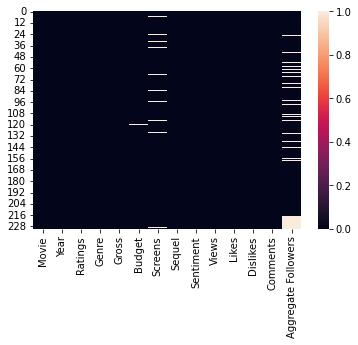

In [6]:
sns.heatmap(df.isna())

In [7]:
df['Genre'].unique()# missing 5,11,13,14

array([ 8,  1,  3, 10, 15, 12,  9,  2,  7,  6,  4])

In [8]:
df['Ratings'].nunique()

45

In [9]:
df['Sequel'].unique()

array([1, 2, 3, 5, 6, 4, 7])

In [10]:
df['Sentiment'].unique()

array([  0,   2,   3,   4,  29,  -1,  -2,   9,   5,  -4,   1,   6, -11,
        -9,  14,  10,  -5,  27,  13,   8,   7,  17,  20,  -3,  11,  -6,
        21, -17,  15,  -8,  19,  16, -38,  25,  18,  26])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Movie                231 non-null    object 
 1   Year                 231 non-null    int64  
 2   Ratings              231 non-null    float64
 3   Genre                231 non-null    int64  
 4   Gross                231 non-null    int64  
 5   Budget               230 non-null    float64
 6   Screens              221 non-null    float64
 7   Sequel               231 non-null    int64  
 8   Sentiment            231 non-null    int64  
 9   Views                231 non-null    int64  
 10  Likes                231 non-null    int64  
 11  Dislikes             231 non-null    int64  
 12  Comments             231 non-null    int64  
 13  Aggregate Followers  196 non-null    float64
dtypes: float64(4), int64(9), object(1)
memory usage: 25.4+ KB


In [16]:
df.describe()

,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
count,231.000000,231.000000,231.000000,2.310000e+02,2.300000e+02,221.000000,231.000000,231.000000,2.310000e+02,231.000000,231.000000,231.000000,1.960000e+02
mean,2014.294372,6.441558,5.359307,6.806603e+07,4.792173e+07,2209.244344,1.359307,2.809524,3.712851e+06,12732.536797,679.051948,1825.701299,3.038193e+06
std,0.456750,0.988765,4.141611,8.890289e+07,5.428825e+07,1463.767755,0.967241,6.996775,4.511104e+06,28825.484481,1243.929481,3571.040447,4.886278e+06
min,2014.000000,3.100000,1.000000,2.470000e+03,7.000000e+04,2.000000,1.000000,-38.000000,6.980000e+02,1.000000,0.000000,0.000000,1.066000e+03
25%,2014.000000,5.800000,1.000000,1.030000e+07,9.000000e+06,449.000000,1.000000,0.000000,6.233020e+05,1776.500000,105.500000,248.500000,1.830250e+05
50%,2014.000000,6.500000,3.000000,3.740000e+07,2.800000e+07,2777.000000,1.000000,0.000000,2.409338e+06,6096.000000,341.000000,837.000000,1.052600e+06
75%,2015.000000,7.100000,8.000000,8.935000e+07,6.500000e+07,3372.000000,1.000000,5.500000,5.217380e+06,15247.500000,697.500000,2137.000000,3.694500e+06
max,2015.000000,8.700000,15.000000,6.430000e+08,2.500000e+08,4324.000000,7.000000,29.000000,3.262678e+07,370552.000000,13960.000000,38363.000000,3.103000e+07


In [17]:
categorical_cols = ['Year','Ratings','Genre','Sequel']
numerical_cols = ['Gross','Budget','Screens','Views','Likes','Dislikes','Comments','Aggregate Followers']

In [19]:
df_pro = df.drop('Movie',axis=1)

In [31]:
df_pro

,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2015,6.4,4,1210000,50000000.0,66.0,1,4,3701061,9325,641,1859,NaN
227,2015,5.5,15,21000000,37000000.0,2815.0,1,13,7119456,18803,1128,2290,NaN
228,2015,5.4,8,10200000,35000000.0,2777.0,1,7,3450614,6823,325,409,NaN
229,2015,5.4,1,12300000,3000000.0,NaN,1,10,66872,400,67,201,NaN


In [32]:
X = df_pro.drop('Sentiment',axis =1 )
y = df_pro['Sentiment']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('ordinal', OrdinalEncoder(handle_unknown='error'))
])

# bool_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant')),
#     ('bool', BinaryEncoder())
# ])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
#         ,
#         ('bool',bool_transformer,bool_cols)
    ])

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier  


model = RandomForestClassifier(n_estimators=30, random_state=0)
# model = SVC()
# param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
# model = GridSearchCV(SVC(),param_grid,verbose=0)
# model = DecisionTreeClassifier()
# model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 

In [38]:
from sklearn.metrics import classification_report

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('scaler',MinMaxScaler()),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_test)

# Evaluate the model
# score = mean_absolute_error(y_test, preds)
print(classification_report(y_test, preds))

ValueError: Found unknown categories [4.9, 8.7] in column 0 during transform